In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_excel('sample_data.xlsx')

In [7]:
print(df)


    Week Start     Bookings
0   2021-08-01   129.808103
1   2021-08-08   122.962071
2   2021-08-15   153.664518
3   2021-08-22   234.772937
4   2021-08-29   214.594944
..         ...          ...
99  2023-06-25   598.200447
100 2023-07-02   269.178765
101 2023-07-09   333.417922
102 2023-07-16   551.074481
103 2023-07-23  1782.905032

[104 rows x 2 columns]


In [8]:
df.head()

,Week Start,Bookings
0,2021-08-01,129.808103
1,2021-08-08,122.962071
2,2021-08-15,153.664518
3,2021-08-22,234.772937
4,2021-08-29,214.594944


In [9]:
df.tail()

,Week Start,Bookings
99,2023-06-25,598.200447
100,2023-07-02,269.178765
101,2023-07-09,333.417922
102,2023-07-16,551.074481
103,2023-07-23,1782.905032


In [10]:
df.set_index('Week Start',inplace=True)

In [11]:
df.head()

,Bookings
Week Start,
2021-08-01,129.808103
2021-08-08,122.962071
2021-08-15,153.664518
2021-08-22,234.772937
2021-08-29,214.594944


In [12]:
df.describe()

,Bookings
count,104.000000
mean,298.630160
std,270.466468
min,79.037187
25%,168.917520
50%,214.398070
75%,300.018497
max,1782.905032


In [ ]:
Step 2. Visualize the Data

<Axes: xlabel='Week Start'>

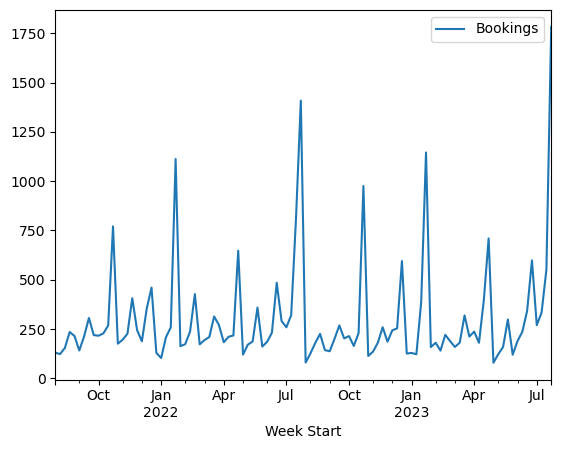

In [13]:
df.plot()

In [14]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [21]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [19]:
adfuller_test(df['Bookings'])

ADF Test Statistic:-2.029835274093249
p-value:0.27364649177938016
#Lags Used:13
Number of Observations Used:90
Weak evidence against alternate hypo


In [20]:
adfuller_test(df['Bookings'])

ADF Test Statistic:-2.029835274093249
p-value:0.27364649177938016
#Lags Used:13
Number of Observations Used:90
Weak evidence against alternate hypo


In [22]:
adfuller_test(df['Bookings'])


ADF Test Statistic:-2.029835274093249
p-value:0.27364649177938016
#Lags Used:13
Number of Observations Used:90
Weak evidence against null hypo


In [23]:
#### If it is non stationary we have to make it Stationary
### Differencing
df['Seasonal First Difference']=df['Bookings']-df['Bookings'].shift(13)

In [25]:
df.head(15)

,Bookings,Seasonal First Difference
Week Start,,
2021-08-01,129.808103,NaN
2021-08-08,122.962071,NaN
2021-08-15,153.664518,NaN
2021-08-22,234.772937,NaN
2021-08-29,214.594944,NaN
2021-09-05,141.077460,NaN
2021-09-12,212.493876,NaN
2021-09-19,305.957476,NaN
2021-09-26,219.117424,NaN


In [26]:
### Again performing adfuller_test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-5.60927274215038
p-value:1.2139647354157933e-06
#Lags Used:12
Number of Observations Used:78
Strong evidence against null hypo


<Axes: xlabel='Week Start'>

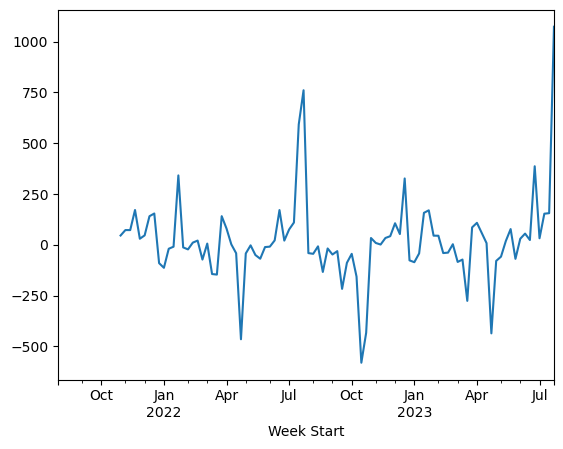

In [27]:
### Now data is stationary as p value is less than .05
df['Seasonal First Difference'].plot()

In [29]:
#### Auto Regressive Model- Autocorrelation and Partial Autocorrelation

### For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [30]:
#### ARIMA has 3 parts- auto regressive (AR model), differencing and moving average
#### AR Model is done with PACF (Partial Autocorrelation)
### p- AR model lags,d- differencing,q- Moving avg lags
### we have 13 NaN so 14th onwards data is coming
# p=1, q= acf better than pacf as no exponentail decrease =0 or 1, d=1 as 1 time it has been shifted
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Bookings'],order=(1,1,1),seasonal_order=(1,1,1,13))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [31]:
results=model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99821D+00    |proj g|=  6.41228D-01

At iterate    5    f=  5.64814D+00    |proj g|=  4.25043D-03

At iterate   10    f=  5.64587D+00    |proj g|=  6.57312D-03

At iterate   15    f=  5.62190D+00    |proj g|=  4.51918D-02

At iterate   20    f=  5.53653D+00    |proj g|=  4.27272D-03

At iterate   25    f=  5.53347D+00    |proj g|=  1.81548D-02

At iterate   30    f=  5.53277D+00    |proj g|=  1.35290D-04

At iterate   35    f=  5.53127D+00    |proj g|=  2.95891D-02

At iterate   40    f=  5.52682D+00    |proj g|=  8.87588D-03

At iterate   45    f=  5.52641D+00    |proj g|=  1.64792D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<Axes: xlabel='Week Start'>

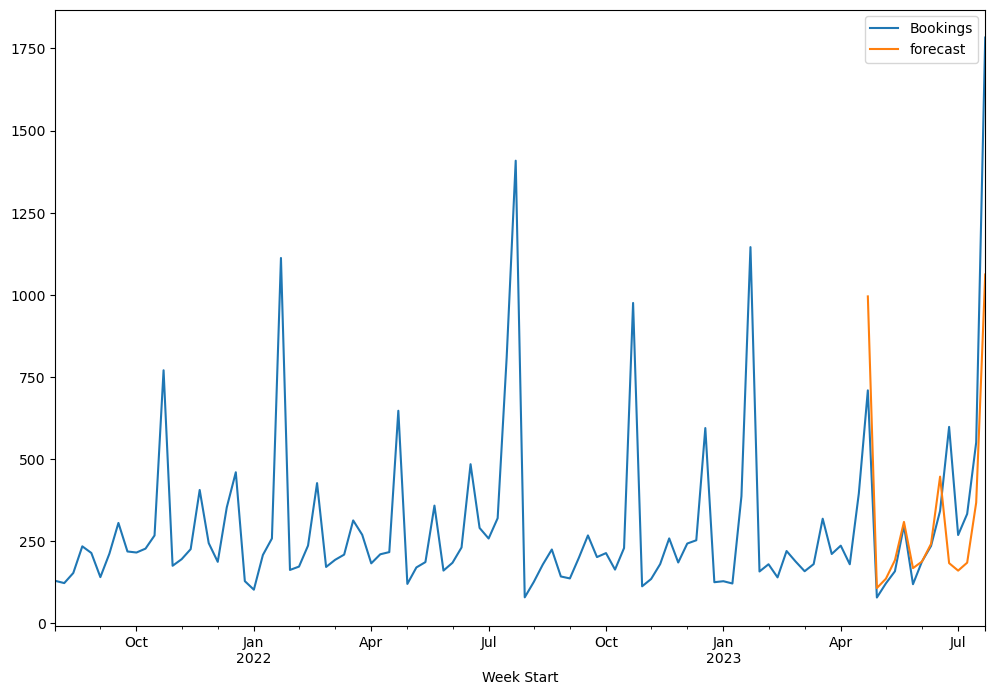

In [32]:
df['forecast']=results.predict(start=90, end = 103, dynamic=True)
df[['Bookings','forecast']].plot(figsize=(12,8))

In [74]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,24)]

In [75]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [76]:
future_dataset_df.tail()

,Bookings,Seasonal First Difference,forecast
Week Start,,,
2023-12-03,NaN,NaN,NaN
2023-12-10,NaN,NaN,NaN
2023-12-17,NaN,NaN,NaN
2023-12-24,NaN,NaN,NaN
2023-12-31,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_dataset_df])

<Axes: xlabel='Week Start'>

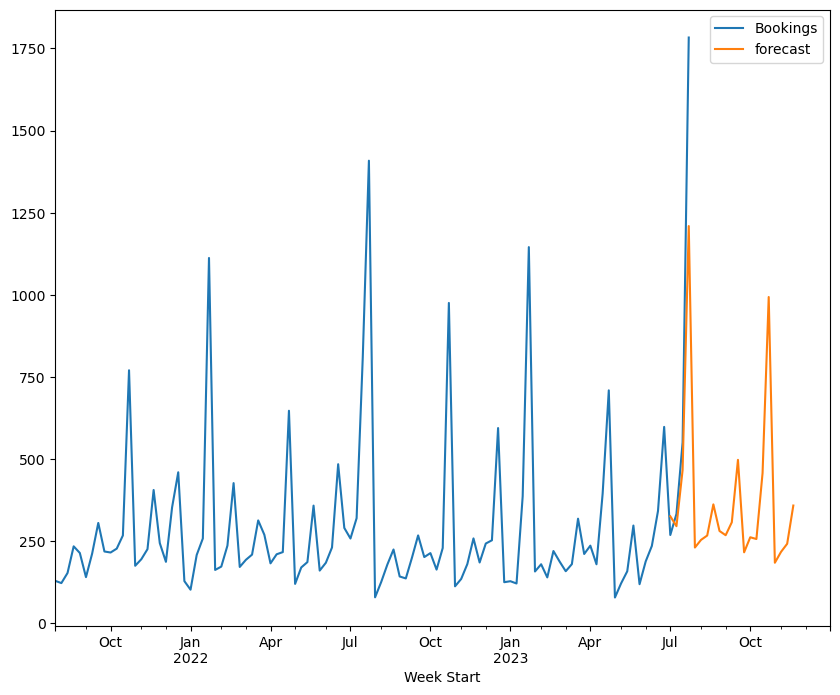

In [83]:
future_df['forecast']=results.predict(start=100, end=120, dynamic=True)
future_df[['Bookings','forecast']].plot(figsize=(10,8))